# **Imports and Installs**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#import preprocessor as p
import re
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import string
import html
import requests
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
import pickle
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files
import io

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install preprocessor
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=68d98c3307a31a174ce70b0a882b03859c9163e7b2abc816cd9e0d4ff53df480
  Stored in directory: /root/.cache/pip/wheels/18/41/3e/30e0c08b0759166f31aee174d58d288ad5c277bd102c8ad869
Successfully built preprocessor
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirem

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Tweet Preprocessing**

In [4]:
df_putin_jan = pd.read_csv("/content/drive/MyDrive/Datasets/tweet_putin_jan.csv")
df_putin_feb = pd.read_csv("/content/drive/MyDrive/Datasets/tweet_putin_feb.csv")
df_putin_mar = pd.read_csv("/content/drive/MyDrive/Datasets/tweet_putin_mar.csv")

In [5]:
col = ["Unnamed:0", "ID", "Date", "Tweet"]
df_putin = pd.DataFrame(columns=col)

df_putin = pd.concat([df_putin, df_putin_jan])
df_putin = pd.concat([df_putin, df_putin_feb])
df_putin = pd.concat([df_putin, df_putin_mar])

In [6]:
def clean_text(_sentence):

    #removes emojis, pictographs, map symbols and flags
    emoji_pattern = re.compile(pattern = "["
          u"\U0001F600-\U0001F64F" 
          u"\U0001F300-\U0001F5FF" 
          u"\U0001F680-\U0001F6FF" 
          u"\U0001F1E0-\U0001F1FF" 
                            "]+", flags = re.UNICODE)
    _sentence = emoji_pattern.sub(r'',_sentence)

    #emoves tags and attributes
    _sentence = re.sub('(<[^>]*>)','',_sentence)

    #converts character code to string
    _sentence = html.unescape(_sentence)

    #removes urls
    _sentence = re.sub("(\w+:\/\/\S+)|(http[^\s]+)|(www.[^\s]+)",'',_sentence, flags=re.MULTILINE)
    
    #removes RT
    _sentence = re.sub("RT",'',_sentence)
    
    #converts the sentence to a lower case
    _sentence = _sentence.lower()

    #removes punctuation
    _sentence = re.sub(r'\@\w+|\#\w+','', _sentence)
    _sentence = _sentence.translate(str.maketrans('', '', (string.punctuation)))
    
    #checks for stop words
    stop_words = set(stopwords.words('english'))
    _sentence = [word for word in str(_sentence).split() if word not in stop_words]

    #joins the word and returns a sentence
    return " ".join(_sentence)

#function to preprocess tweets
def preprocess_tweets(tweets_df,column):

    #apply clean text in a vectorized format
    vfunc_clean_text = np.vectorize(clean_text)
    tweets_df[column] = vfunc_clean_text(tweets_df[column]) #create a new column that consists of preprocessed tweets
    
    return tweets_df

In [28]:
df_putin.drop_duplicates(subset=["Tweet"],keep='first',inplace=False,ignore_index=True)

,Unnamed:0,ID,Date,Tweet,Unnamed: 0
0,NaN,1609279239265583104,2022-12-31 20:04:04+00:00,putin office end next year one way another,5499.0
1,NaN,1609279270236442626,2022-12-31 20:04:11+00:00,russias unconditional capitulation downfall pu...,5498.0
2,NaN,1609279290666876928,2022-12-31 20:04:16+00:00,nope people right side history don’t support p...,5497.0
3,NaN,1609279313249202178,2022-12-31 20:04:21+00:00,junior’s idea foreign policy tickling putin’s ...,5496.0
4,NaN,1609279331465039872,2022-12-31 20:04:26+00:00,it’s nato simply waiting putin die meantime hu...,5495.0
...,...,...,...,...,...
456188,NaN,1641186368297525251,2023-03-29 21:11:36+00:00,putin terror nato,165004.0
456189,NaN,1641186371124736000,2023-03-29 21:11:37+00:00,putins lost plot russia didnt attack georgia u...,165003.0
456190,NaN,1641186386437980160,2023-03-29 21:11:40+00:00,yeah mightve got invaded anyways putin dreams ...,165002.0
456191,NaN,1641186392632881154,2023-03-29 21:11:42+00:00,putin pretty good targeting specific places on...,165001.0


In [44]:
putin_df = preprocess_tweets(df_putin,'Tweet')

# **Logistic Regression Model Training**

In [45]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/sentiment_analysis.csv")
df = df.drop(['ID'], axis=1)
df.head()

,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


In [46]:
df = preprocess_tweets(df, 'text')

In [47]:
X = df.loc[:, ['text']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
bag = count.fit_transform(X_train['text'].tolist())

In [49]:
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True,
                         norm='l2',
                         smooth_idf=True)

np.set_printoptions(precision=2)

In [50]:
from collections import Counter

vocab = Counter()
for twit in X_train.text:
    for word in twit.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('love', 42385),
 ('happy', 40825),
 ('great', 23262),
 ('good', 21919),
 ('im', 20543),
 ('best', 20086),
 ('amazing', 19574),
 ('day', 18533),
 ('birthday', 17562),
 ('one', 13723),
 ('thank', 13584),
 ('found', 13340),
 ('dont', 12588),
 ('like', 12383),
 ('beautiful', 12258),
 ('transponder', 11427),
 ('much', 11133),
 ('get', 10924),
 ('today', 10857),
 ('cant', 10325)]

In [51]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

In [52]:
import math

def plot_distribution(vocabulary):

    hist, edges = np.histogram(list(map(lambda x:math.log(x[1]),vocabulary.most_common())), density=True, bins=500)

    p = figure(tools="pan,wheel_zoom,reset,save",
               toolbar_location="above",
               title="Word distribution accross all twits")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#555555", )
    show(p)

plot_distribution(vocab)

In [53]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

vocab_reduced = Counter()
for w, c in vocab.items():
    if not w in stop:
        vocab_reduced[w]=c

vocab_reduced.most_common(20)

plot_distribution(vocab_reduced)

In [55]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [56]:
# Best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)


param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__tokenizer': [tokenizer],
               'clf__penalty': ['l2'],
               'clf__C': [10.0],
              'clf__solver': ['liblinear'],
              'clf__max_iter': [1000]}
]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1)

In [57]:
# Note: This process took 25 hours
gs_lr_tfidf.fit(X_train.values.ravel(), y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0))]),
             param_grid=[{'clf__C': [10.0], 'clf__max_iter': [1000],
                          'clf__penalty': ['l2'], 'clf__solver': ['liblinear'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__tokenizer': [<function tokenizer at 0x7f09c9098790>]}],
             scoring='accuracy', verbose=1)

In [58]:
#print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best accuracy: 0.974


In [59]:
clf = gs_lr_tfidf.best_estimator_
#clf.fit(X_train.values, y_train)
clf.fit(X_test['text'].tolist(), y_test)
print('Accuracy in test: %.3f' % clf.score(X_test['text'].tolist(), y_test))

Accuracy in test: 0.992


# **Vader**

In [68]:
def Vader_process(data_df):
    sid = SentimentIntensityAnalyzer()
    res = [*data_df['Tweet'].apply(sid.polarity_scores)]
    #print(res[:3])

    sentiment_df = pd.DataFrame.from_records(res)
    data_df = pd.concat([data_df.reset_index(drop=True), sentiment_df.reset_index(drop=True)], axis=1, join="inner")
    #print(data_df.head())
    
    conditions = [
    (data_df['compound'] <= -0.5),
    (data_df['compound'] > -0.5) & (data_df['compound'] < 0.5),
    (data_df['compound'] >= 0.5)
    ]

    values = [0, -1, 1]
    senti=['negative','neutral','positive']
    data_df['sentiment']=np.select(conditions,senti)
    data_df['label']=np.select(conditions,values)

    #print(data_df.head())
    
    X_df = data_df[data_df.label != -1]
    X_df = X_df[['Tweet','label']]
    #print(X_df.head())
    
    return X_df,data_df

In [69]:
X_putin,data = Vader_process(putin_df)

<Axes: title={'center': '#putin\xa0Tweets\xa0Sentiment\xa0Distribution\xa0May\xa0-\xa0Jul\xa022'}, ylabel='None'>

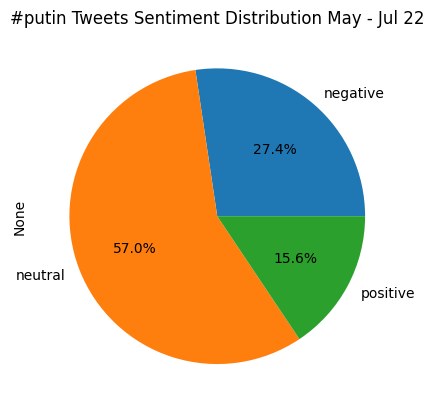

In [70]:
x=data.groupby('sentiment').size()
x.plot.pie(title="#putin Tweets Sentiment Distribution May - Jul 22",autopct='%1.1f%%')

<Axes: title={'center': 'Frequency\xa0of\xa0Sentiment\xa0per\xa0Month'}, xlabel='Date'>

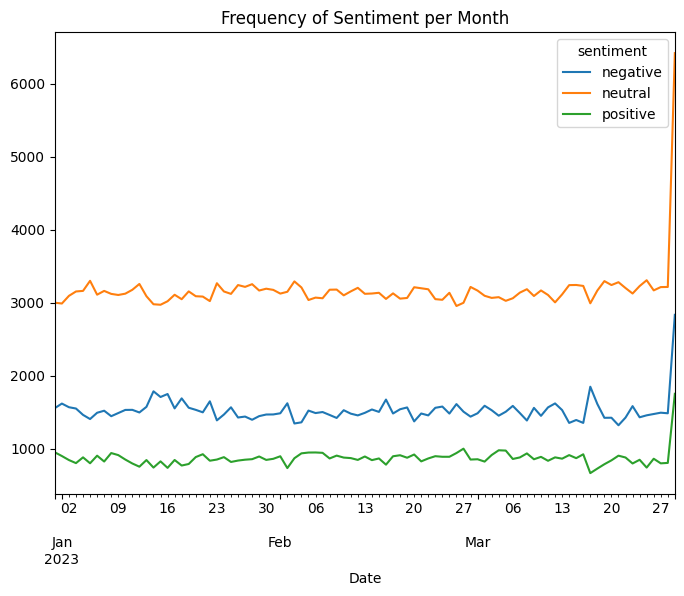

In [72]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
freq_per_month=data.groupby(pd.Grouper(freq='D'))['sentiment'].value_counts()
freq_per_month=freq_per_month.unstack(level='sentiment')
freq_per_month.plot(kind='line',figsize=(8,6),title='Frequency of Sentiment per Month')

# **Logistic regression for predicting labels**

In [76]:
X_putin

,Tweet,label
4,it’s nato simply waiting putin die meantime hu...,0
5,xi playing china selfpreservation putin reckle...,0
8,russia isnt full nationalised industries run o...,0
9,don’t get putin party get party government,1
10,read zelenskyy russian nonhumans devil’s side ...,0
...,...,...
494993,understand russia longer true communist state ...,0
494994,wide putin walk it’s ironwood way obliterate c...,0
494995,putin terror nato,0
494997,yeah mightve got invaded anyways putin dreams ...,1


In [77]:
X_putin['Predicted Label'] = clf.predict(X_putin['Tweet'])

In [78]:
print("Report for Tweets with Putin Jan to March")
print(classification_report(X_putin['label'],X_putin['Predicted Label']))

Report for Tweets with Putin Jan to March
              precision    recall  f1-score   support

           0       0.74      0.98      0.85    135456
           1       0.93      0.40      0.56     77301

    accuracy                           0.77    212757
   macro avg       0.84      0.69      0.70    212757
weighted avg       0.81      0.77      0.74    212757



# **BERTopic Modelling**

In [79]:
import nltk
from nltk.corpus import stopwords
from umap import UMAP
from bertopic import BERTopic

In [80]:
umap_model = UMAP(random_state=3231)
bert_topic_model= BERTopic(embedding_model = "all-MiniLM-L6-v2", umap_model=umap_model)

bert_negative = X_putin[X_putin['label']==0] #change this to 1 if positive. keep 0 if negative.
bert_negative = bert_negative.Tweet.tolist()
topics, probs = bert_topic_model.fit_transform(bert_negative)

In [81]:
pd.set_option('display.max_rows', None)


In [82]:
topic_list=bert_topic_model.get_topic_info()
topic_list

,Topic,Count,Name
0,-1,63219,-1_people_trump_ukraine_russia
1,0,2697,0_nato_expansion_natos_join
2,1,2178,1_zelensky_zelenskyy_zelenskys_zelenski
3,2,2099,2_nukes_nuclear_nuke_use
4,3,1247,3_children_kids_mothers_parents
5,4,1214,4_china_chinese_chinas_xi
6,5,870,5_end_stop_started_stops
7,6,748,6_biden_joe_bidens_weak
8,7,733,7_evil_pure_evils_table
9,8,597,8_wagner_group_mercenaries_prigozhin


In [83]:
bert_topic_model.visualize_barchart()

In [84]:
#Positive
umap_model = UMAP(random_state=3231)
bert_topic_model= BERTopic(embedding_model = "all-MiniLM-L6-v2", umap_model=umap_model)

bert_positive = X_putin[X_putin['label']==1] #change this to 1 if positive. keep 0 if negative.
bert_positive = bert_positive.Tweet.tolist()
topics, probs = bert_topic_model.fit_transform(bert_positive)

pd.set_option('display.max_rows', None)
topic_list=bert_topic_model.get_topic_info()
topic_list

bert_topic_model.visualize_barchart()